In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def build_poly(x, degree, offset=True):
    '''Polynomial basis functions for input data x,
    for up to a certain degree.'''
    if offset:
        rows, cols = np.indices((x.shape[0], degree+1))
        tx = np.power(x[rows], cols)
    else:
        rows, cols = np.indices((x.shape[0], degree))
        tx = np.power(x[rows], cols+1)
    return tx

def build_model_data(x, y):
    '''Form (y,tX) to get regression data in matrix form. Uses build_poly.'''
    return y, build_poly(x, 1, offset=True)

In [3]:
def standardize(x):
    '''Standardize the original data set.'''
    mean_x = np.mean(x, axis=0)
    x = x - mean_x
    std_x = np.std(x, axis=0)
    x = x / std_x
    return x, mean_x, std_x

In [4]:
def compute_mse(y, tx, w):
    '''
    Calculates the loss using mse.
    The value returned equals (2*RMSE)^2
    '''
    if len(tx.shape) == 1:
        tx = tx.reshape(-1, 1)
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)
    w = np.array(w).reshape(tx.shape[1], 1)
    z = y - tx.dot(w)
    z = z.T.dot(z)
    return z[0][0] / tx.shape[0]

In [5]:
def least_squares(y, tx):
    '''
    Calculates the least squares solution using the normal equations.
    It returns RMSE and the optimal weights.
    '''
    w_opt = np.linalg.pinv(tx).dot(y)
    rmse = np.sqrt(compute_mse(y, tx, w_opt))
    return w_opt, rmse

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [6]:
from helpers import *

In [7]:
height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
w_opt, rmse = least_squares(y, tx)

Test it here

In [8]:
print(rmse)
print(w_opt)

5.54723135786
[ 73.293922    13.47971243]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [9]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [10]:
from plots import *

In [11]:
def polynomial_regression():
    '''Constructing the polynomial basis function expansion of the data,
       and then running least squares regression.'''

    # define parameters
    degrees = [1, 3, 7, 12]

    # define structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        x_standardized, mean_x, std_x = standardize(x)
        tx = build_poly(x_standardized, degree)
        w_opt, rmse = least_squares(y, tx)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))

        # plot fit
        plot_fitted_curve(
            y, x_standardized, w_opt, degree, axs[ind // num_col][ind % num_col])

    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773748
Processing 3th experiment, degree=7, rmse=0.24965870360907508
Processing 4th experiment, degree=12, rmse=0.24032507466876604


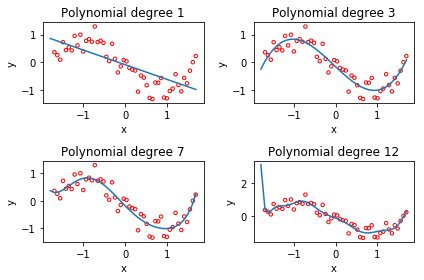

In [12]:
polynomial_regression()

In [28]:
def polynomial_regression():
    '''Constructing the polynomial basis function expansion of the data,
       and then running least squares regression.'''

    # define parameters
    degrees = [1, 3, 7, 12]

    # define structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)
    x_standardized, mean_x, std_x = standardize(x)
    for ind, degree in enumerate(degrees):
        tx = build_poly(x_standardized, degree)
        w_opt, rmse = least_squares(y, tx)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))

        # plot fit
        x_cont = np.linspace(np.min(x),np.max(x),100)
        x_cont_standardized = (x_cont-mean_x)/std_x
        X_cont = build_poly(x_cont_standardized, degree)
        y_cont = X_cont.dot(w_opt)
        plt.subplot(2,2,ind+1)
        plt.scatter(x, y, s=10),
        plt.plot(x_cont, y_cont, color='darkorange')
        
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773748
Processing 3th experiment, degree=7, rmse=0.24965870360907508
Processing 4th experiment, degree=12, rmse=0.24032507466876604


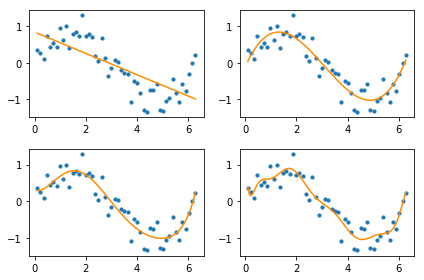

In [29]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [30]:
def split_data(x, y, ratio, seed=1):
    '''
    Split the dataset based on the split ratio. E.g. if ratio is 0.8
    you will have 80% of your data set dedicated to training
    and the rest dedicated to testing
    '''
    np.random.seed(seed)

    size = int(ratio * x.shape[0])
    indices = np.random.permutation(x.shape[0])
    training_idx, test_idx = indices[:size], indices[size:]

    x_training, x_test = x[training_idx], x[test_idx]
    y_training, y_test = y[training_idx], y[test_idx]

    return x_training, x_test, y_training, y_test


Then, test your `split_data` function below.

In [31]:
print(split_data(np.array([[1, 1],[2, 2],[3, 3],[4, 4],[5, 5]]), np.array([2,4,6,8,10]), .8))
print()
print(split_data(np.array([ 1, 2, 3, 4, 5]), np.array([2,4,6,8,10]), .8))

(array([[3, 3],
       [2, 2],
       [5, 5],
       [1, 1]]), array([[4, 4]]), array([ 6,  4, 10,  2]), array([8]))

(array([3, 2, 5, 1]), array([4]), array([ 6,  4, 10,  2]), array([8]))


In [32]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # split the data, and return train and test data
    x_training, x_test, y_training, y_test = split_data(x, y, ratio, seed)

    # form train and test data with polynomial basis function
    x_training_standardized, mean_x, std_x = standardize(x_training)
    tx_training = build_poly(x_training_standardized, degree)
    x_test_standardized = (x_test - mean_x) / std_x
    tx_test = build_poly(x_test_standardized, degree)

    # calculate weights using least squares
    w_opt, rmse_tr = least_squares(y_training, tx_training)

    # calculate RMSE for train and test data,
    rmse_te = np.sqrt(2 * compute_mse(y_test, tx_test, w_opt))
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

In [33]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.256
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.292
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.311
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.353
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.751
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.419
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.402
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.506
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.755
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.650
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=3.781
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=15.998


# 3 Ridge Regression
Please fill in the function below.

#### *TODO - How to standardize:*
Using mean and stddev obtained by using the whole data.
Using mean and stddev obtained by using the training data (and using these for the test data).

In [52]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    standardized_x, mean_x, std_x = standardize(x)
    
    # split the data, and return train and test data
    x_training, x_test, y_training, y_test = split_data(standardized_x, y, ratio, seed)

    # form train and test data with polynomial basis function
    tx_training = build_poly(x_training, degree)
    tx_test = build_poly(x_test, degree)

    rmse_tr = np.ones(len(lambdas))
    rmse_te = np.ones(len(lambdas))

    for ind, lambda_ in enumerate(lambdas):
        # ridge regression with a given lambda
        w_opt, rmse_training = ridge_regression(y_training, tx_training, lambda_)
        rmse_test = np.sqrt(compute_mse(y_test, tx_test, w_opt))
        
        rmse_tr[ind] = rmse_training
        rmse_te[ind] = rmse_test
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


In [53]:
def ridge_regression(y, tx, lambda_):
    '''Implements ridge regression using normal equations.'''
    I = np.eye(tx.shape[1])
    w_opt = np.linalg.inv(tx.T.dot(tx) + lambda_*2*tx.shape[1]*I).dot(tx.T.dot(y))
    rmse = np.sqrt(compute_mse(y, tx, w_opt))
    return w_opt, rmse

In [54]:
# define parameter
lambda_= 0
x, mean_x, std_x = standardize(x)

# form train and test data with polynomial basis function
tx = build_poly(x, 7)

# ridge regression with a given lambda
w_opt, rmse = ridge_regression(y, tx, lambda_)

print(rmse)

0.249658703609


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.204, Testing RMSE=0.339
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.204, Testing RMSE=0.339
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.204, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.204, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.204, Testing RMSE=0.331
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.205, Testing RMSE=0.324
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.207, Testing RMSE=0.313
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.213, Testing RMSE=0.301
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.222, Testing RMSE=0.292
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.234, Testing RMSE=0.290
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.251, Testing RMSE=0.299
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.283, Testing RMSE=0.331
proportion=0.5, degree=7, lambda=0.193, 

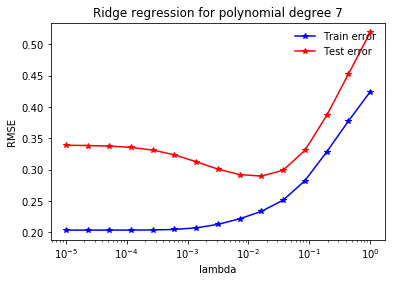

In [55]:
seed = 13
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)